In [15]:
from sklearn.preprocessing import StandardScaler
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#warnings.ignore

# Función para elegir los datos xlsx
# Cargamos los datos de la base de datos
f = pn.read_excel('ENB2012_data.xlsx',header =0)

#cargar las dimensiones de X (diferentes columnas) en 'x', y los outputs en 'y'
xi = []
x = f.iloc[:,:-2].values
y = f.iloc[:,-2:].values

for i in range(0, x.shape[1]):
    xi.append(f.iloc[:,i].values)
    
y1 = f.iloc[:,-1].values
y2 = f.iloc[:,-2].values

print("Dimensionalitat de X", x.shape)

Dimensionalitat de X (768, 8)


(array([ 20., 187., 153.,  39.,  39.,  59.,  83.,  83.,  59.,  46.]),
 array([ 6.01 ,  9.719, 13.428, 17.137, 20.846, 24.555, 28.264, 31.973,
        35.682, 39.391, 43.1  ]),
 <a list of 10 Patch objects>)

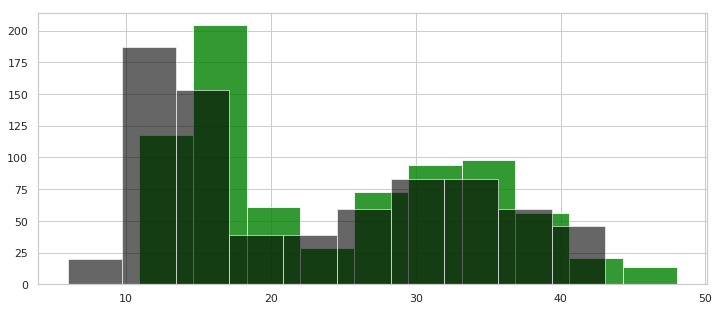

In [16]:
#rc parametros para los plots
plt.rc('text', usetex = True)
plt.rc('font', family = 'times')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (12, 5))

#parametros para los plots con seaborn
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale = 1, rc = {"lines.linewidth": 2, 'font_family': [u'times']})

plt.rcParams["text.usetex"] = False

#historama de y1 e y2
plt.hist(y1, color="green", alpha=0.8) 
plt.hist(y2, color="black", alpha=0.6) 

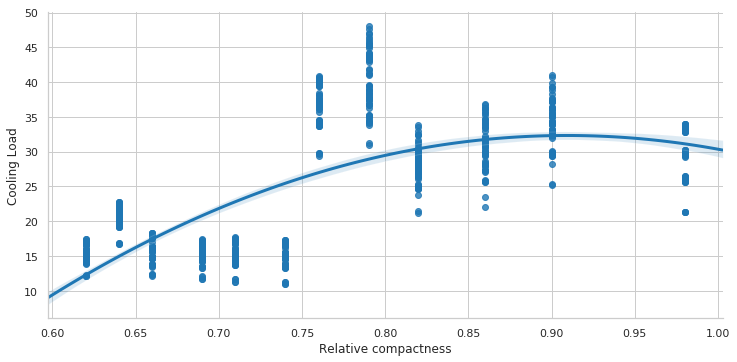

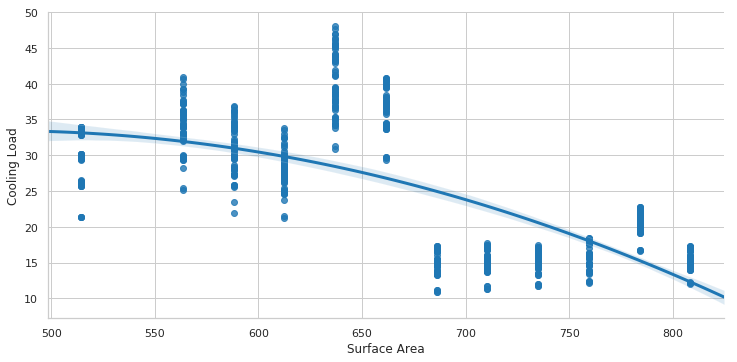

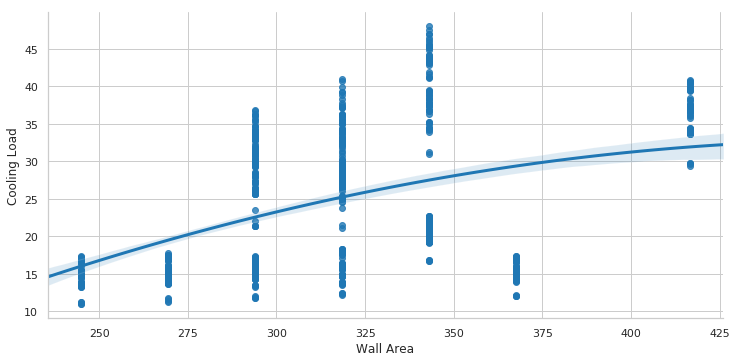

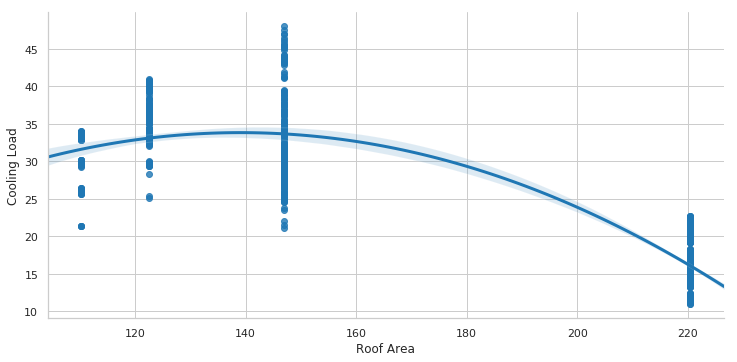

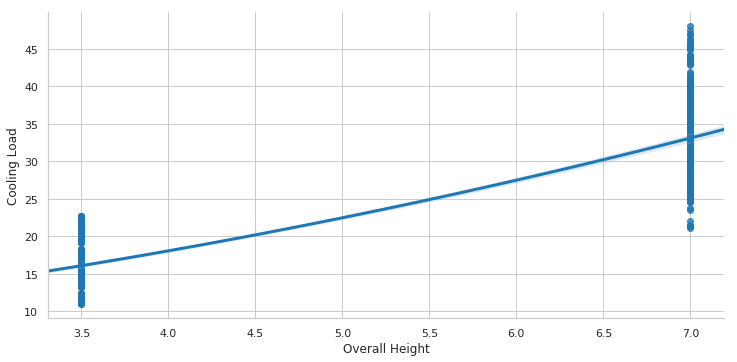

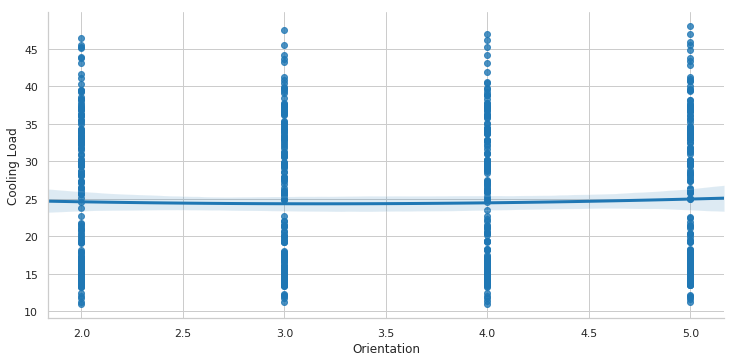

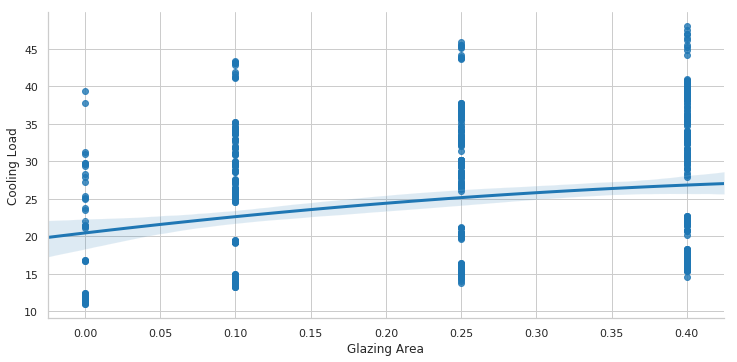

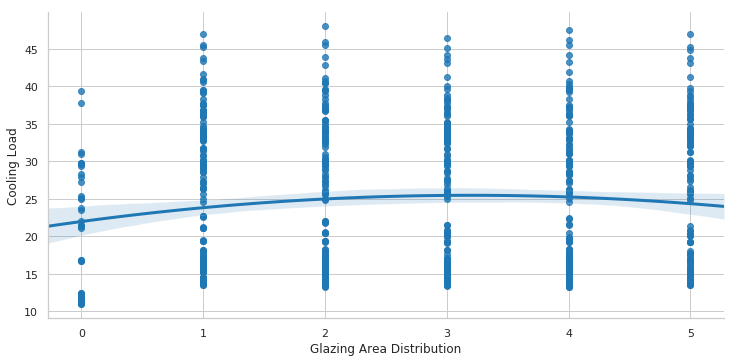

In [17]:
#columnas del fichero xlsx
col =  ["Relative compactness", "Surface Area", "Wall Area", 
        "Roof Area", "Overall Height", "Orientation", "Glazing Area",
        "Glazing Area Distribution", "Heating Load", "Cooling Load"]

#dataframe para hacer la gráfica con seaborn de la correlación lineal de las dimensiones de X con y1
data = pn.DataFrame(f.values,columns =col )
for i in range(0,8):
    sns.lmplot(col[i],col[9] ,data, order = 2, size = 5.2, aspect = 2)


Las gráficas previas muestran todas las dimensiones de X respecto el "cooling load", una de las salidas.

En estas gráficas podemos ver que los datos puestos y una regresión lineal con un polimómia de grado 2 (lmplot --> order: 2).

Entre todas las gráficas cabe destacar la figura 7: "orientación". Que nos da la pista que esta dimensión no afecta a la salida. Para confirmar que esta dimensión no afecta a las salidas veremos que no afecta al "heating load", la salida que falta, tampoco.

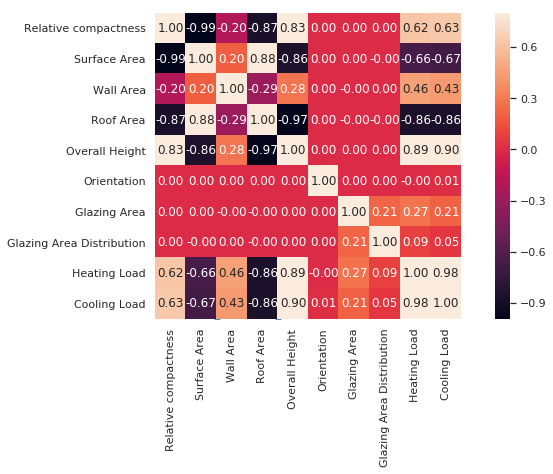

In [18]:
#gráfica de la orientación con y2 y gráfica(con la siguiente celda) de la matriz de correlación y sus valores
sns.lmplot(col[5],col[8] ,data, order = 2, size = 5.2, aspect = 2)    

correlation = data.corr()
sns.heatmap(correlation, vmax = .8, square = True, fmt = ".2f", annot = True)

En la matriz de correlación podemos ver claramente que las dimensiones como orientación y distribución del area acristalada tienen escaso efecto sobre los valores de salida. 

También se observa que el area acristalada aporta información pero en menor medida que el resto de atributos. Por esta razón, más adelante, consideraremos si es necesaria para entrenar nuestro modelo y de qué manera.

error cuadratico (mse): 7.739862212171482
r2 score: 0.911236981419622


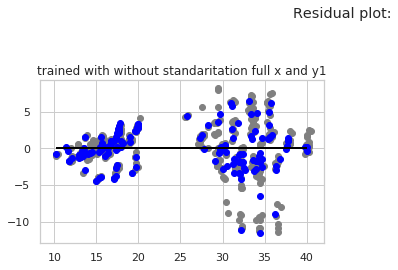

In [19]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#dividir los datos para las fases de entrenamiento, validación y test

Xnostd_train, Xnostd_test, ynostd_train, ynostd_test = train_test_split(x, y1, test_size=0.4, shuffle = True, random_state = 42)

Xnostd_validation, Xnostd_test, ynostd_validation, ynostd_test = train_test_split(Xnostd_test, ynostd_test, test_size=0.5, shuffle = True, random_state = 42)

#crear y entrenar el regresor lineal
regr = linear_model.LinearRegression()

regr.fit(Xnostd_train, ynostd_train)

#predicción
ynostd_pred = regr.predict(Xnostd_validation)
ynostd_train_pred = regr.predict(Xnostd_train)

#error cuadrático
nostd_mse = mean_squared_error(ynostd_validation, ynostd_pred)
print("error cuadratico (mse): " + str(nostd_mse))

#variación del resultado
nostd_r2 = r2_score(ynostd_validation, ynostd_pred)
print("r2 score: " + str(nostd_r2))

#gráficos residual plot
f_rp = plt.figure(figsize = (11.2,10.2))
f_rp.suptitle("Residual plot:")

ax = f_rp.add_subplot(321)

ax.title.set_text("trained with without standaritation full x and y1")

ax.scatter(ynostd_train_pred, ynostd_train_pred - ynostd_train, color="grey")
ax.scatter(ynostd_pred, ynostd_pred - ynostd_validation, color="blue")
ax.hlines(0, np.min(ynostd_pred), xmax=np.max(ynostd_pred))

error cuadratico (mse): 110.10589099888665
r2 score: 0.8435847400108446


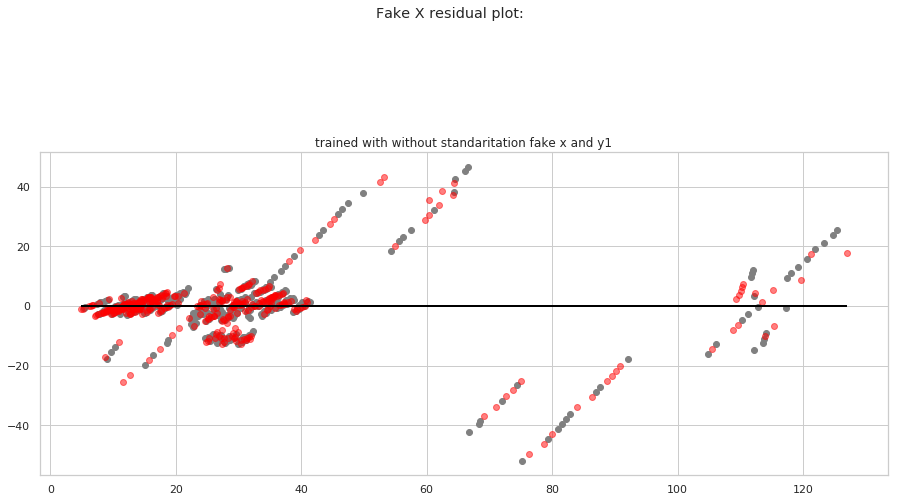

In [20]:
#PRUEBA PERSONAL: NO ME CREO QUE X CON/SIN ESTANDARIZAR DEN UN PLOT IGUAL
#voy a meter mierda en la X para ver si hay cambios o lo estoy haciendo mal
fake = pn.read_excel('FAKE_DATA.xlsx',header =0)
xf = fake.iloc[:,:-2].values
yf = fake.iloc[:,-2].values

#dividir los datos FAKE para las fases de entrenamiento, validación y test
Xf_train, Xf_validation, yf_train, yf_validation = train_test_split(xf, yf, test_size=0.4, shuffle = True, random_state = 42)

#crear y entrenar el regresor lineal con FAKE X
regr = linear_model.LinearRegression()

regr.fit(Xf_train, yf_train)

#predicción FAKE
yf_pred = regr.predict(Xf_validation)
yf_train_pred = regr.predict(Xf_train)

#error cuadrático FAKE
f_mse = mean_squared_error(yf_validation, yf_pred)
print("error cuadratico (mse): " + str(f_mse))

#variación del resultado FAKE
f_r2 = r2_score(yf_validation, yf_pred)
print("r2 score: " + str(f_r2))

#gráficos FAKE residual plot
f_fake = plt.figure(figsize = (15.2,20.2))
f_fake.suptitle("Fake X residual plot:")

axf = f_fake.add_subplot(311)

axf.title.set_text("trained with without standaritation fake x and y1")

axf.scatter(yf_train_pred, yf_train_pred - yf_train, color="grey")
axf.scatter(yf_pred, yf_pred - yf_validation, color="red", alpha=0.5)
axf.hlines(0, np.min(yf_pred), xmax=np.max(yf_pred))

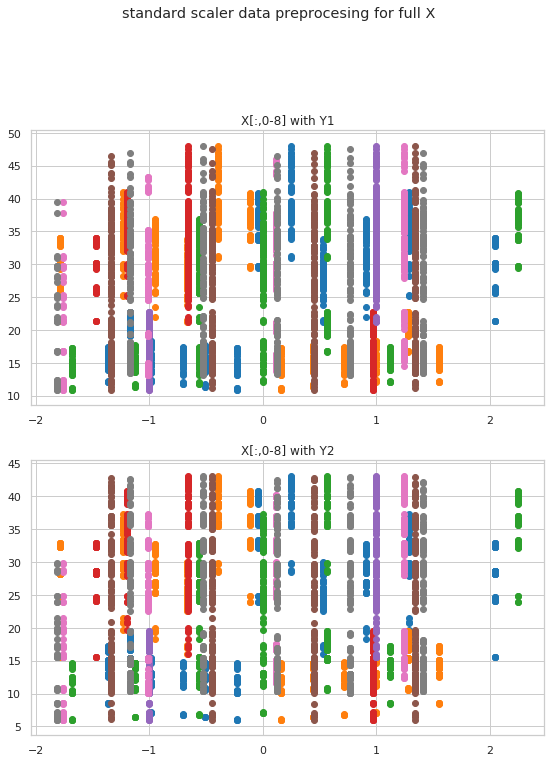

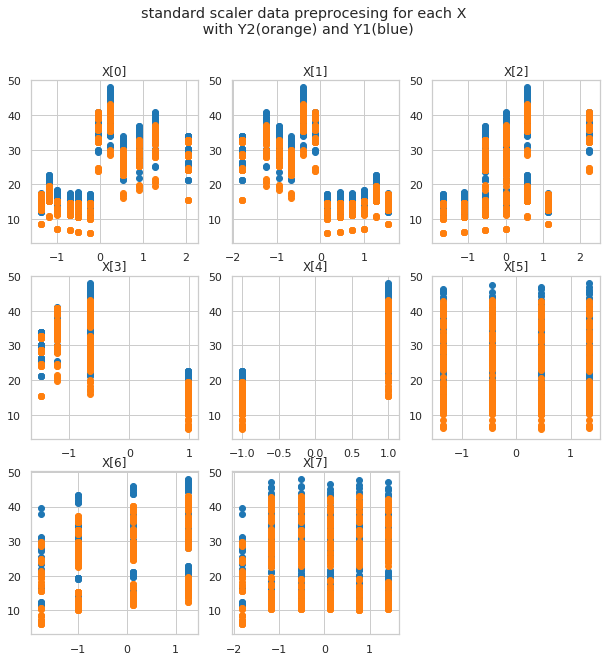

In [21]:
#estandarizar los datos de todas las dimensiones de x alrededor de cero
scaler = StandardScaler()

scaler.fit(x)

t = scaler.transform(x)
ti = []

for i in range(0, x.shape[1]):
    scaler.fit(xi[i].reshape(-1,1))
    ti.append(scaler.transform(xi[i].reshape(-1,1)))

#figuras tamaño & figuras título
f_std_sclr = plt.figure(figsize = (9.2,17.2))
f_std_sclr.suptitle("standard scaler data preprocesing for full X")

#subfiguras/gráficas título
ax1 = f_std_sclr.add_subplot(311)
ax2 = f_std_sclr.add_subplot(312)

ax1.title.set_text("X[:,0-8] with Y1")
ax2.title.set_text("X[:,0-8] with Y2")

#subfiguras/gráficas asignacion de ejes
for i in range(0, x.shape[1]):
    ax1.scatter(t[:,i], y1)
    ax2.scatter(t[:,i], y2) 

#pintar gráficas
plt.show()

#figuras tamaño & figuras título
f_ocho_d = plt.figure(figsize = (10.2,10.2))
f_ocho_d.suptitle("standard scaler data preprocesing for each X \n with Y2(orange) and Y1(blue)")

#subfiguras/gráficas título
axi_y1 = []
axi_y2 = []

for i in range(331, 331 + x.shape[1]):
    axi_y1.append(f_ocho_d.add_subplot(i))
    axi_y2.append(f_ocho_d.add_subplot(i))
    axi_y2[i - 331].title.set_text("X[" + str(i - 331) + "]")

for i in range(0, x.shape[1]):
    axi_y1[i].scatter(ti[i], y1)
    axi_y2[i].scatter(ti[i], y2)  

#pintar gráficas
plt.show()

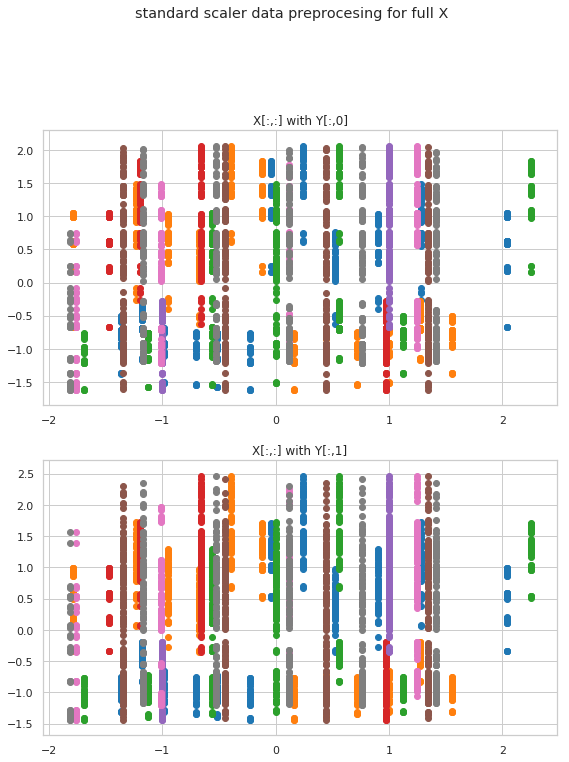

In [22]:
#estandarizar los datos de todas las dimensiones de x alrededor de cero
scaler = StandardScaler()

scaler.fit(x)

t = scaler.transform(x)

#estandarizar los datos de todas las dimensiones de y alrededor de cero
scaler.fit(y)

ty = scaler.transform(y)

ti = []

for i in range(0, x.shape[1]):
    scaler.fit(xi[i].reshape(-1,1))
    ti.append(scaler.transform(x))

#figuras tamaño & figuras título
f_std_sclr = plt.figure(figsize = (9.2,17.2))
f_std_sclr.suptitle("standard scaler data preprocesing for full X")

#subfiguras/gráficas título
ax1 = f_std_sclr.add_subplot(311)
ax2 = f_std_sclr.add_subplot(312)

ax1.title.set_text("X[:,:] with Y[:,0]")
ax2.title.set_text("X[:,:] with Y[:,1]")

#subfiguras/gráficas asignacion de ejes
for i in range(0, x.shape[1]):
    ax1.scatter(t[:,i], ty[:,0])
    ax2.scatter(t[:,i], ty[:,1])    

#pintar gráficas
plt.show()

Después de este seguido de gráficas podemos establecer que la direnecia entre las salidas es mínima y no hace falta tener en cuenta las dos, con tener solo una es suficiente. 

error cuadratico (mse): 7.729602878212909
r2 score: 0.9113546384819603


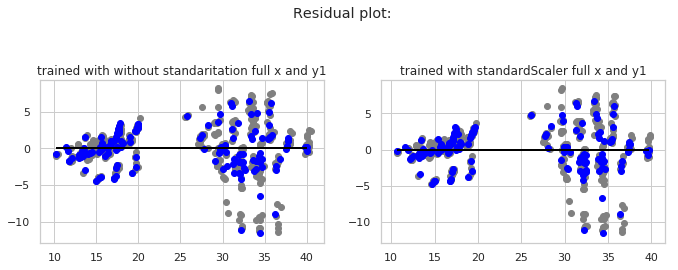

In [23]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#dividir los datos para las fases de entrenamiento, validación y test
X_train, X_test, y_train, y_test = train_test_split(t, y1, test_size=0.4, shuffle = True, random_state = 42)

X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle = True, random_state = 42)

#crear y entrenar el regresor lineal
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

#predicción
y_pred = regr.predict(X_validation)
y_train_pred = regr.predict(X_train)

#error cuadrático
mse = mean_squared_error(y_validation, y_pred)
print("error cuadratico (mse): " + str(mse))

#variación del resultado
r2 = r2_score(y_validation, y_pred)
print("r2 score: " + str(r2))

#gráficos residual plot

ax1 = f_rp.add_subplot(322)

ax1.title.set_text("trained with standardScaler full x and y1")

ax1.scatter(y_train_pred, y_train_pred - y_train, color="grey")
ax1.scatter(y_pred, y_pred - y_validation, color="blue")
ax1.hlines(0, np.min(y_pred), xmax=np.max(y_pred))

f_rp

En este residual plot podemos ver que los datos estan distribuidos entre 10 y 40, en el eje de las 'y', lo que nos aporta que nuestro modelo esta entrenado bien. No hay valores extraños, está dentro del rango de las salidas. También podemos apreciar que del 20 al 25 no hay apenas puntos. Esto es debido a que, como se puede apreciar en el histograma de las 'y' que hay al principio del jupyter, hay muy pocas muestras que tengas como salida esas temperaturas.

Por otro lado en el eje de la 'x' vemos que los puntos estan distribuidos alrededor de cero. Además estan distribuidos bastante aleatoreamente. La falta de una forma definida en los puntos o la falta de una concentración de puntos no indica que nuestro modelo a estado bien entrenado.

In [24]:
print("max of y1: " + str(np.max(y1)))

print("min of y1: " + str(np.min(y1)))

max of y1: 48.03
min of y1: 10.9


Los valores que salen diremos que son normales pues tener un error de, aproximadamente, 7 cuando los valores estan comprendidos entre 10 y 48 hacen fiable el error cuadrático. Además el r2 score es muy cercano a '1' lo que conlleva a que el modelo entrenado se acerca más al modelo óptimo.

Estos resultados son para una x con todas las dimensiones, ahora miraremos que sucede si le sacamos las dimensiones que argumentabamos que estaban poco relacionadas con las salidas (orientación y distribución de area acristalada)

error cuadratico (mse): 7.877618914139446
r2 score: 0.9113546384819603


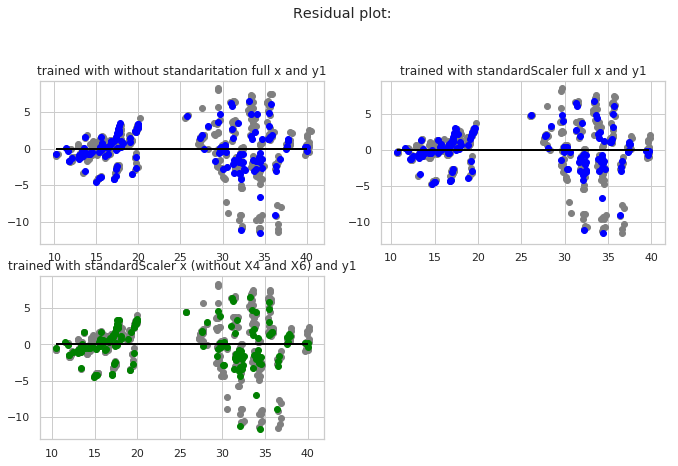

In [25]:
#X sin los valores que creemos innecesarios
xm = f.drop(["X4", "X6"], axis=1).iloc[:,:-2].values

#estandarizar valores
scaler.fit(xm)

tm = scaler.transform(xm)

#dividir los datos para las fases de entrenamiento, validación y test
Xm_train, Xm_test, ym_train, ym_test = train_test_split(tm, y1, test_size=0.4, shuffle = True, random_state = 42)

Xm_validation, Xm_test, ym_validation, ym_test = train_test_split(Xm_test, ym_test, test_size=0.5, shuffle = True, random_state = 42)

#crear y entrenar el regresor lineal
regr = linear_model.LinearRegression()
regr.fit(Xm_train, ym_train)

#predicción
ym_pred = regr.predict(Xm_validation)
ym_train_pred = regr.predict(Xm_train)

#error cuadrático
Mmse = mean_squared_error(ym_validation, ym_pred)
print("error cuadratico (mse): " + str(Mmse))

#variación del resultado
mr2 = r2_score(ym_validation, ym_pred)
print("r2 score: " + str(r2))

#gráficos residual plot
ax2 = f_rp.add_subplot(323)

ax2.title.set_text("trained with standardScaler x (without X4 and X6) and y1")

ax2.scatter(ym_train_pred, ym_train_pred - ym_train, color="grey")
ax2.scatter(ym_pred, ym_pred - ym_validation, color="green")
ax2.hlines(0, np.min(ym_pred), xmax=np.max(ym_pred))

f_rp

### Los valores son iguales con lo que los valores que deciamos de X aportan muy poco, o nada, a las salidas.

error cuadratico (mse): 17.523986131773714
r2 score: 0.9113546384819603


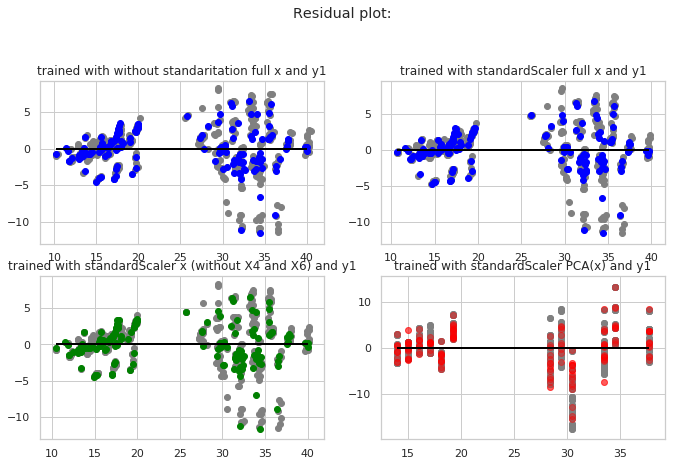

<Figure size 864x360 with 0 Axes>

In [94]:
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D

#hacer y entrenar pca
fig = plt.figure()
pca = decomposition.PCA(n_components=2)

pca.fit(x)

x_pca = pca.transform(x)

#dividir los datos para las fases de entrenamiento, validación y test
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(x_pca, y1, test_size=0.4, shuffle = True, random_state = 42)

Xpca_validation, Xpca_test, ypca_validation, ypca_test = train_test_split(Xpca_test, ypca_test, test_size=0.5, shuffle = True, random_state = 42)

#crear y entrenar el regresor lineal
regr = linear_model.LinearRegression()

regr.fit(Xpca_train, ypca_train)

#predicción
ypca_pred = regr.predict(Xpca_validation)
ypca_train_pred = regr.predict(Xpca_train)

#error cuadrático
PCAmse = mean_squared_error(ypca_validation, ypca_pred)
print("error cuadratico (mse): " + str(PCAmse))

#variacón del resultado
PCAr2 = r2_score(ypca_validation, ypca_pred)
print("r2 score: " + str(r2))

#gráficos residual plot

ax3 = f_rp.add_subplot(324)

ax3.title.set_text("trained with standardScaler PCA(x) and y1")

ax3.scatter(ypca_train_pred, ypca_train_pred - ypca_train, color="grey")
ax3.scatter(ypca_pred, ypca_pred - ypca_validation, color="red", alpha = 0.4)
ax3.hlines(0, np.min(ypca_pred), xmax=np.max(ypca_pred))

f_rp

Podemos ver las cuatro gráficas y concluir que que la más útil, siguiendo el razonamiento del primer plot residual que hemos descrito, es el linear regressor entrenado con la x estandarizada. También se puede tomar la grafica de la X estandarizada sin las dimensiones X4 y X6 ya que los resultados son prácticamente idénticos. Incluso se puede escoger la gráfica de la x sin estandarizar, pero es una buena práctica trabajar con datos estandarizados. Aquí es una caso en el que no afecta la estandarización, pero siempre es útil y bueno trabajar con datos estandarizados.

Ya elegidas las entradas toca entrenar, validar y testear el modelo. Eso se puede hacer de tres maneras: básica, K-fold-cross-validation y Leave-one-out-cross-validation.

El modo básico ya lo hemos empezado con la función train_test_split, dónde separamos las pruebas en un 60% entrenamiento, 20% validación y 20% test.

### Practica 1b, apartado C: Amprendiendo clasificadores.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

In [44]:
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[-n_train:]
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

In [102]:
particions = [0.5, 0.7, 0.8]

# generem dataset de classificació aleatori per a l'exemple
#nuestros valores deberian ser x = xm , y= y1,  pero da error de que son variables continuas
x = np.random.random((100, 3))
y = np.array([-1,1])[np.random.randint(0, 2, 768)]

x=xm
y=y1
x_train, y_train, x_val, y_val = split_data(x, y)


for part in particions:
  
  
   
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
    # l'entrenem
    logireg.fit(x_t, y_t)
  
    print ("Correct classification Logistic ", part, "%: ", logireg.score(x_v, y_v))
    y_pred = logireg.predict(x_v)
    percent_correct_log = np.mean(y_v == y_pred).astype('float32')
    print ("Correct classification Logistic ", part, "%: ", percent_correct_log, "\n")
   

ValueError: Unknown label type: 'continuous'

In [73]:
from sklearn import svm

def train_svm(x, y, kernel='linear', C=0.01, gamma=0.001, probability=True):
    if(kernel =='linear'):
        svclin = svm.SVC(C=C, kernel=kernel, gamma=gamma, probability=probability)

    if(kernel =='poly'):
        svclin = svm.SVC(C=C, kernel=kernel, gamma=gamma, probability=probability)

    if(kernel =='rbf'):
        svclin = svm.SVC(C=C, kernel=kernel, gamma=gamma, probability=probability)

    # l'entrenem
    return svclin.fit(x, y)